# Season table scraper

### To get our data we will get it from fbref.com 

In [91]:
# Importing libraries

# Web scraping liberaries
from bs4 import BeautifulSoup
import requests
import time

# Data analysis liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# !pip install import_ipynb
import import_ipynb
# import /path/to/notebook.ipynb

importing Jupyter notebook from Analysing_premier_league_seasons.ipynb
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               22 non-null     int64  
 1   Squad            22 non-null     object 
 2   MP               22 non-null     int64  
 3   W                22 non-null     int64  
 4   D                22 non-null     int64  
 5   L                22 non-null     int64  
 6   GF               22 non-null     int64  
 7   GA               22 non-null     int64  
 8   GD               22 non-null     int64  
 9   Pts              22 non-null     int64  
 10  Pts/MP           22 non-null     float64
 11  Attendance       22 non-null     object 
 12  Top Team Scorer  22 non-null     object 
 13  Goalkeeper       22 non-null     object 
 14  Notes            7 non-null      object 
dtypes: float64(1), int64(9), object(5)
memo

ModuleNotFoundError: No module named 'Analysing_premier_league_seasons.ipynb'; 'Analysing_premier_league_seasons' is not a package

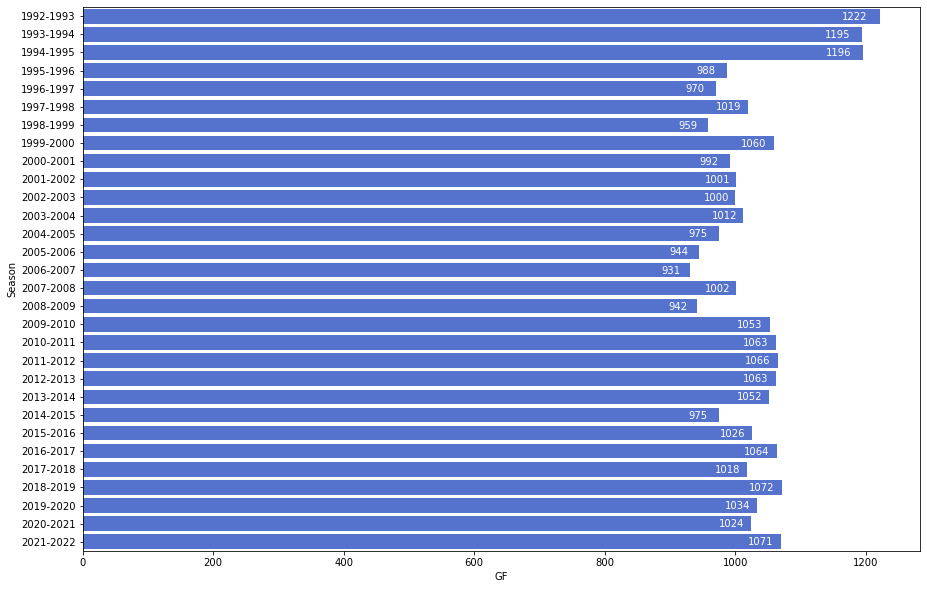

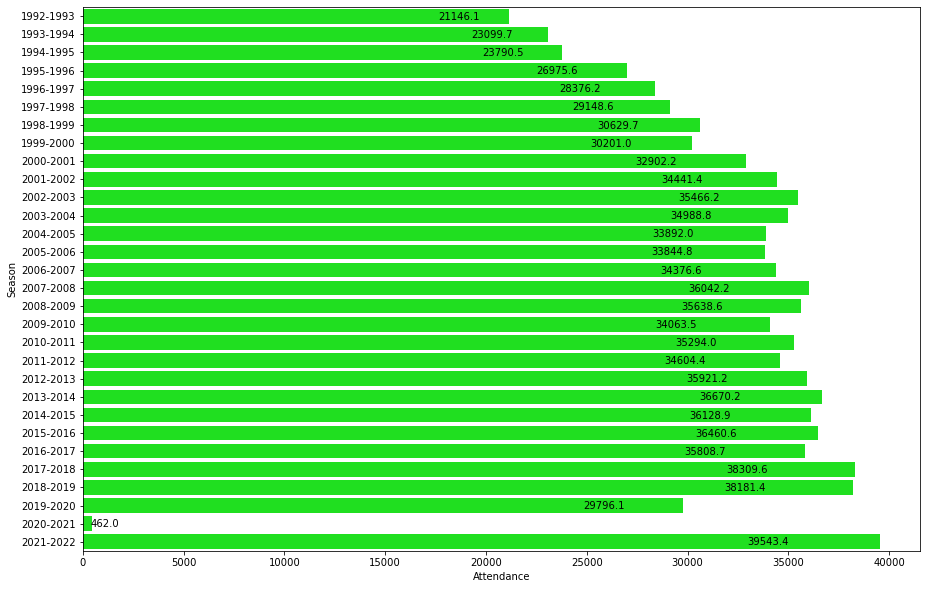

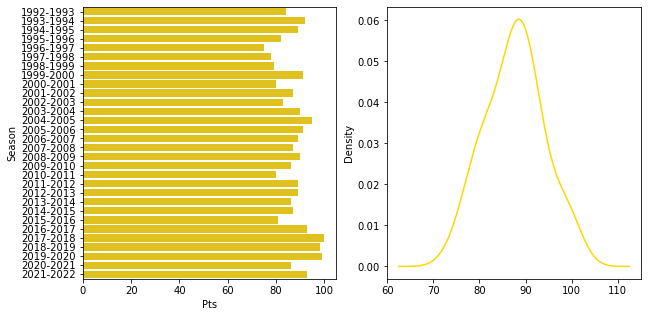

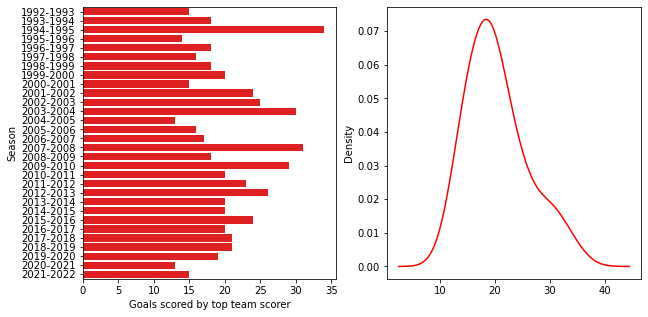

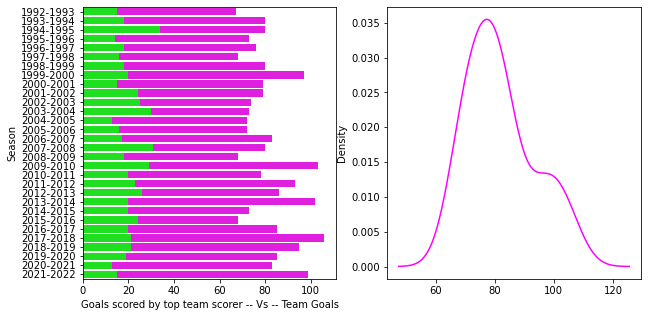

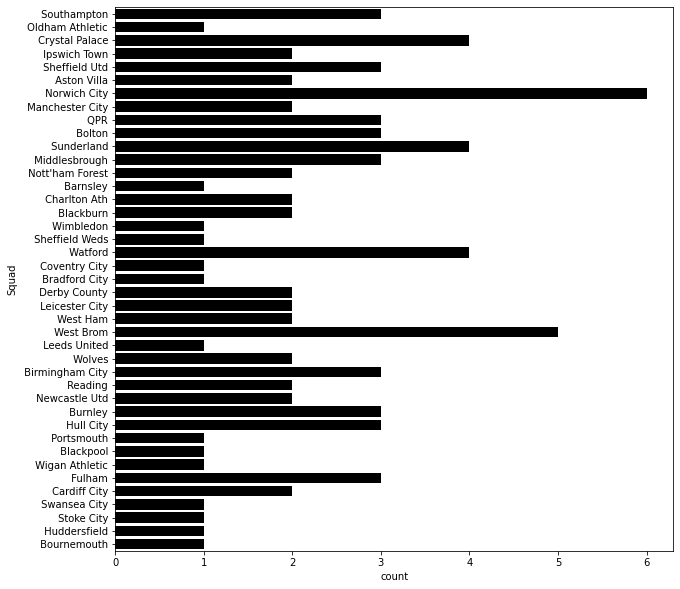

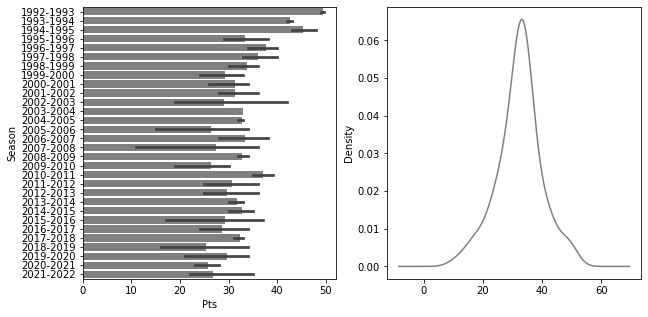

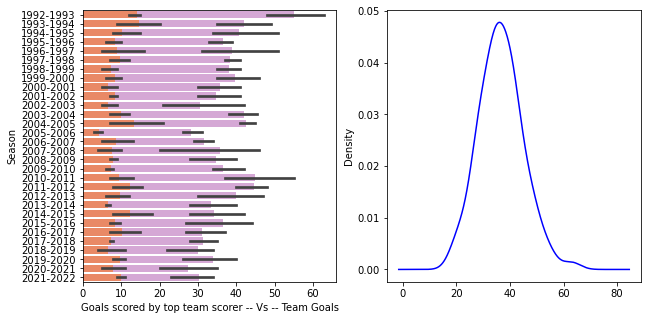

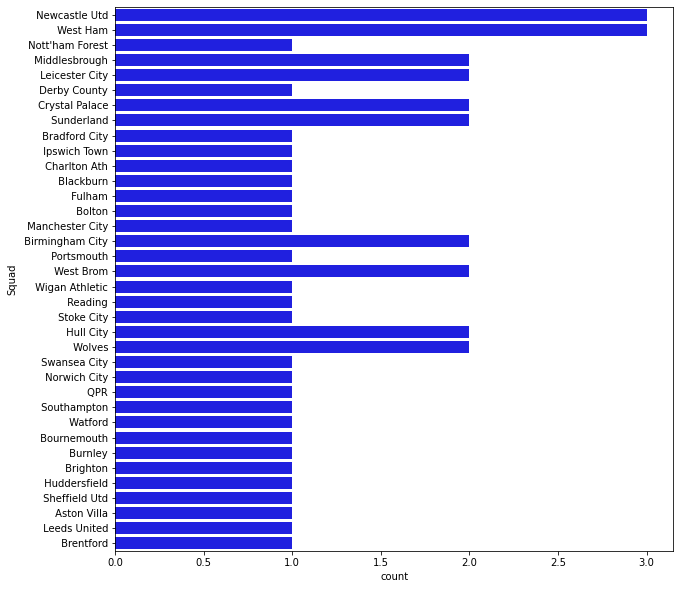

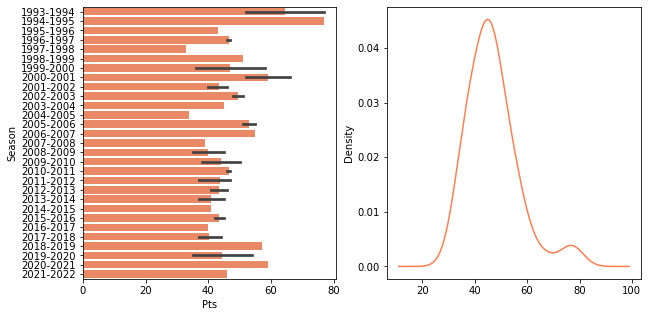

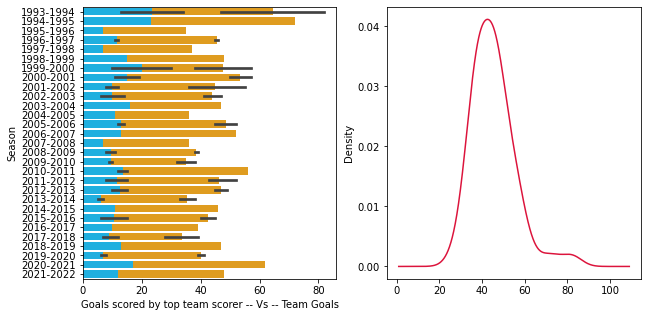

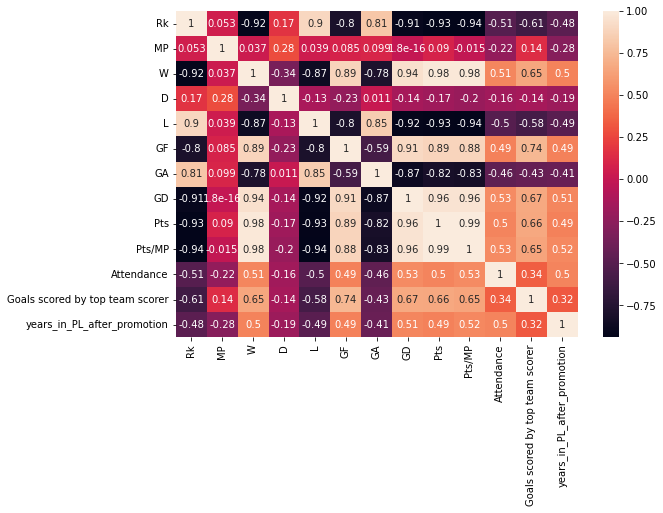

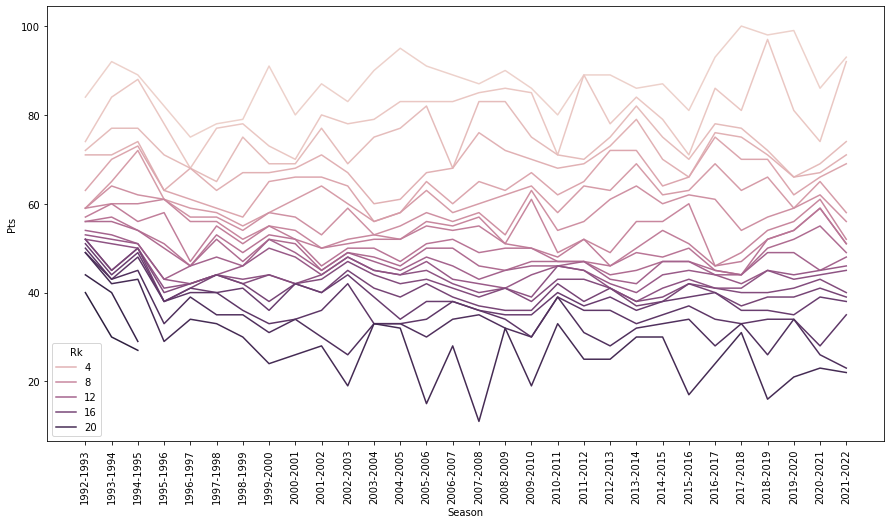

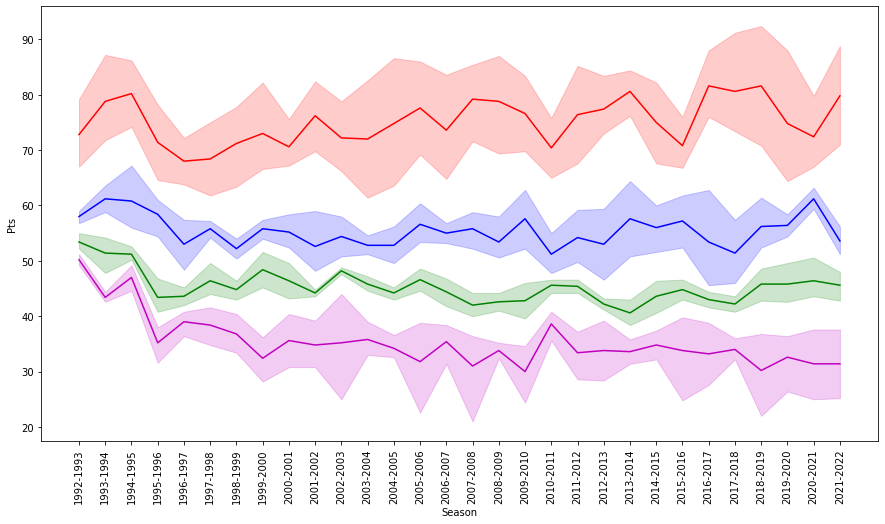

In [94]:
import Analysing_premier_league_seasons.ipynb

### Important funtion for scraping the website

In [149]:
def text_extract_from_contents(contents_list):
    '''
    Input : 
    Output :  
    
    '''
    list_ = []
    for i in range(len(contents_list)):
        if contents_list[i] == " " or contents_list[i] == "\n":
            pass
        else:
            list_.append(contents_list[i].text)
    
    return list_

In [150]:
def content_to_list(content_list):
    '''
    Input : Content of tags 
    Output : Return a list without space and tags as element of list.
    
    '''
    list_ = []
    for i in range(len(content_list)):
        if content_list[i] == " " or content_list[i] == "\n":
            pass
        else:
            list_.append(content_list[i])
    return list_

In [151]:
def create_dictionary(list_):
    '''
    Input : List of elements as keys 
    Output : Return a dictionary with 
    '''
    dictionary = {}
    for i in list_:
        dictionary[i] = []
    return dictionary


In [152]:
def final_table(table_headers_list,table_content):
    dictionary = create_dictionary(table_headers_list)
    
    for i in range(len(table_content)):
        detail = text_extract_from_contents(table_content[i].contents)
        for j in range(len(table_headers_list)):
            dictionary[table_headers_list[j]].append(detail[j])
        
    return dictionary

### Understanding the structure and code of the website

In [153]:
URL = "https://fbref.com/en/comps/9/2020-2021/2020-2021-Premier-League-Stats"

In [154]:
page = requests.get(URL)

ConnectionError: HTTPSConnectionPool(host='fbref.com', port=443): Max retries exceeded with url: /en/comps/9/2020-2021/2020-2021-Premier-League-Stats (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001DB8A0CB6D0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [ ]:
code = page.status_code
code

In [ ]:
soup = BeautifulSoup(page.text)

### Getting list tags 

In [ ]:
# Important links 
Imp_links = soup.find_all("ul",{'class':'hoversmooth'})
l = 'https://fbref.com'

In [ ]:
Imp_links[1]

In [155]:
link_list = {}

In [156]:
page_title = []
for j in content_to_list(Imp_links[1].find('ul',{'class' : ""}).contents):
    type_ = j.a['href'].split("1-")[-2].split("/")[-2]
    u =j.a['href'].split("1-")[-1]
    page_ti = f"{type_}-{u}"
    link_dic[page_ti] = f"{l}{j.a['href']}"
    page_title.append(page_ti)
#     print(f"{l}{j.a['href']}")   
for i in content_to_list(Imp_links[1].section.contents):
    u_ =i.a['href'].split("1-")[-1]
    page_ti_ = f"{u_}"
    link_dic[page_ti_] = f"{l}{i.a['href']}"
    page_title.append(page_ti_)
#     print(f"{l}{i.a['href']}")

In [157]:
for k in link_dic.keys():
    print(link_dic[k])

https://fbref.com/en/comps/9/2020-2021/stats/2020-2021-Premier-League-Stats
https://fbref.com/en/comps/9/2020-2021/keepers/2020-2021-Premier-League-Stats
https://fbref.com/en/comps/9/2020-2021/keepersadv/2020-2021-Premier-League-Stats
https://fbref.com/en/comps/9/2020-2021/shooting/2020-2021-Premier-League-Stats
https://fbref.com/en/comps/9/2020-2021/passing/2020-2021-Premier-League-Stats
https://fbref.com/en/comps/9/2020-2021/passing_types/2020-2021-Premier-League-Stats
https://fbref.com/en/comps/9/2020-2021/gca/2020-2021-Premier-League-Stats
https://fbref.com/en/comps/9/2020-2021/defense/2020-2021-Premier-League-Stats
https://fbref.com/en/comps/9/2020-2021/possession/2020-2021-Premier-League-Stats
https://fbref.com/en/comps/9/2020-2021/playingtime/2020-2021-Premier-League-Stats
https://fbref.com/en/comps/9/2020-2021/misc/2020-2021-Premier-League-Stats
https://fbref.com/en/comps/9/2020-2021/2020-2021-Premier-League-Stats
https://fbref.com/en/comps/9/2020-2021/schedule/2020-2021-Premie

In [158]:
link_dic

{'stats-Premier-League-Stats': 'https://fbref.com/en/comps/9/2020-2021/stats/2020-2021-Premier-League-Stats',
 'keepers-Premier-League-Stats': 'https://fbref.com/en/comps/9/2020-2021/keepers/2020-2021-Premier-League-Stats',
 'keepersadv-Premier-League-Stats': 'https://fbref.com/en/comps/9/2020-2021/keepersadv/2020-2021-Premier-League-Stats',
 'shooting-Premier-League-Stats': 'https://fbref.com/en/comps/9/2020-2021/shooting/2020-2021-Premier-League-Stats',
 'passing-Premier-League-Stats': 'https://fbref.com/en/comps/9/2020-2021/passing/2020-2021-Premier-League-Stats',
 'passing_types-Premier-League-Stats': 'https://fbref.com/en/comps/9/2020-2021/passing_types/2020-2021-Premier-League-Stats',
 'gca-Premier-League-Stats': 'https://fbref.com/en/comps/9/2020-2021/gca/2020-2021-Premier-League-Stats',
 'defense-Premier-League-Stats': 'https://fbref.com/en/comps/9/2020-2021/defense/2020-2021-Premier-League-Stats',
 'possession-Premier-League-Stats': 'https://fbref.com/en/comps/9/2020-2021/poss

### Getting tags for previous and Next season.

In [159]:
# mydivs = soup.find_all("div", {"class": "stylelistrow"})
info = soup.find_all("div",{"class": "prevnext"})

In [160]:
for i in content_to_list(info[0].contents):
    link = f"{l}-{i['href']}"
    link_key = i.text
    link_dic[link_key] = link
    print(link_key)
    print(link)

Previous Season
https://fbref.com-/en/comps/9/2019-2020/2019-2020-Premier-League-Stats
Next Season
https://fbref.com-/en/comps/9/2021-2022/2021-2022-Premier-League-Stats


In [161]:
link_dic

{'stats-Premier-League-Stats': 'https://fbref.com/en/comps/9/2020-2021/stats/2020-2021-Premier-League-Stats',
 'keepers-Premier-League-Stats': 'https://fbref.com/en/comps/9/2020-2021/keepers/2020-2021-Premier-League-Stats',
 'keepersadv-Premier-League-Stats': 'https://fbref.com/en/comps/9/2020-2021/keepersadv/2020-2021-Premier-League-Stats',
 'shooting-Premier-League-Stats': 'https://fbref.com/en/comps/9/2020-2021/shooting/2020-2021-Premier-League-Stats',
 'passing-Premier-League-Stats': 'https://fbref.com/en/comps/9/2020-2021/passing/2020-2021-Premier-League-Stats',
 'passing_types-Premier-League-Stats': 'https://fbref.com/en/comps/9/2020-2021/passing_types/2020-2021-Premier-League-Stats',
 'gca-Premier-League-Stats': 'https://fbref.com/en/comps/9/2020-2021/gca/2020-2021-Premier-League-Stats',
 'defense-Premier-League-Stats': 'https://fbref.com/en/comps/9/2020-2021/defense/2020-2021-Premier-League-Stats',
 'possession-Premier-League-Stats': 'https://fbref.com/en/comps/9/2020-2021/poss

#### Find the table tags from web page

In [38]:
table_tags = soup.find('table')

#### Table head tags 

In [17]:
table_tags.thead

<thead> <tr> <th aria-label="Rank" class="poptip sort_default_asc center" data-stat="rank" data-tip="&lt;strong&gt;Rank&lt;/strong&gt;&lt;br&gt;Squad finish in competition&lt;br&gt;Finish within the league or competition.&lt;br&gt;For knockout competitions may show final round reached.&lt;br&gt;Colors and arrows represent promotion/relegation or qualifiation for continental cups.&lt;br&gt;Trophy indicates team won league whether by playoffs or by leading the table.&lt;br&gt;Star indicates topped table in league USING another means of naming champion." scope="col">Rk</th> <th aria-label="Squad" class="poptip sort_default_asc center" data-stat="team" scope="col">Squad</th> <th aria-label="Matches Played" class="poptip center" data-stat="games" data-tip="&lt;strong&gt;Matches Played&lt;/strong&gt;&lt;br&gt;Matches Played by the player or squad" scope="col">MP</th> <th aria-label="Wins" class="poptip center" data-stat="wins" data-tip="&lt;strong&gt;Wins&lt;/strong&gt;&lt;br&gt;Wins" scope=

#### Table body tags 

In [18]:
body_tags = table_tags.tbody

In [19]:
content_to_list(table_tags.thead.contents)

[<tr> <th aria-label="Rank" class="poptip sort_default_asc center" data-stat="rank" data-tip="&lt;strong&gt;Rank&lt;/strong&gt;&lt;br&gt;Squad finish in competition&lt;br&gt;Finish within the league or competition.&lt;br&gt;For knockout competitions may show final round reached.&lt;br&gt;Colors and arrows represent promotion/relegation or qualifiation for continental cups.&lt;br&gt;Trophy indicates team won league whether by playoffs or by leading the table.&lt;br&gt;Star indicates topped table in league USING another means of naming champion." scope="col">Rk</th> <th aria-label="Squad" class="poptip sort_default_asc center" data-stat="team" scope="col">Squad</th> <th aria-label="Matches Played" class="poptip center" data-stat="games" data-tip="&lt;strong&gt;Matches Played&lt;/strong&gt;&lt;br&gt;Matches Played by the player or squad" scope="col">MP</th> <th aria-label="Wins" class="poptip center" data-stat="wins" data-tip="&lt;strong&gt;Wins&lt;/strong&gt;&lt;br&gt;Wins" scope="col">W

In [20]:
table_header_tags = content_to_list(table_tags.thead.contents)

In [21]:
table_header_tags

[<tr> <th aria-label="Rank" class="poptip sort_default_asc center" data-stat="rank" data-tip="&lt;strong&gt;Rank&lt;/strong&gt;&lt;br&gt;Squad finish in competition&lt;br&gt;Finish within the league or competition.&lt;br&gt;For knockout competitions may show final round reached.&lt;br&gt;Colors and arrows represent promotion/relegation or qualifiation for continental cups.&lt;br&gt;Trophy indicates team won league whether by playoffs or by leading the table.&lt;br&gt;Star indicates topped table in league USING another means of naming champion." scope="col">Rk</th> <th aria-label="Squad" class="poptip sort_default_asc center" data-stat="team" scope="col">Squad</th> <th aria-label="Matches Played" class="poptip center" data-stat="games" data-tip="&lt;strong&gt;Matches Played&lt;/strong&gt;&lt;br&gt;Matches Played by the player or squad" scope="col">MP</th> <th aria-label="Wins" class="poptip center" data-stat="wins" data-tip="&lt;strong&gt;Wins&lt;/strong&gt;&lt;br&gt;Wins" scope="col">W

#### Creating a list containing the table headers

In [22]:
table_header_tags = table_header_tags[0]

In [23]:
table_header_tags = content_to_list(table_header_tags.contents)

In [24]:
list_of_table_header = []
for i in table_header_tags:
    list_of_table_header.append(i.text)

In [25]:
list_of_table_header

['Rk',
 'Squad',
 'MP',
 'W',
 'D',
 'L',
 'GF',
 'GA',
 'GD',
 'Pts',
 'Pts/MP',
 'xG',
 'xGA',
 'xGD',
 'xGD/90',
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes']

#### Creating a list of content of table body

In [26]:
table_body_tags = content_to_list(table_tags.tbody.contents)

#### Creating a dictionary of table 

In [27]:
header_dictionary = create_dictionary(list_of_table_header)

In [28]:
for i in table_body_tags:
    team_detail = text_extract_from_contents(i.contents)
    for j in range(len(header_dictionary)):
        header_dictionary[list_of_table_header[j]].append(team_detail[j])
        

In [29]:
pd.DataFrame(header_dictionary)

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Manchester City,38,28,5,5,94,33,+61,89,2.34,78.7,32.1,+46.6,+1.23,"53,249",Erling Haaland - 36,Ederson,→ Champions League via league finish
1,2,Arsenal,38,26,6,6,88,43,+45,84,2.21,71.9,42.0,+29.9,+0.79,"60,191","Martin Ødegaard, Martinelli - 15",Aaron Ramsdale,→ Champions League via league finish
2,3,Manchester Utd,38,23,6,9,58,43,+15,75,1.97,67.7,50.4,+17.3,+0.45,"73,671",Marcus Rashford - 17,David de Gea,→ Champions League via league finish
3,4,Newcastle Utd,38,19,14,5,68,33,+35,71,1.87,72.0,39.6,+32.4,+0.85,"52,127",Callum Wilson - 18,Nick Pope,→ Champions League via league finish
4,5,Liverpool,38,19,10,9,75,47,+28,67,1.76,72.6,50.9,+21.7,+0.57,"53,163",Mohamed Salah - 19,Alisson,→ Europa League via league finish
5,6,Brighton,38,18,8,12,72,53,+19,62,1.63,73.3,50.2,+23.1,+0.61,"31,477",Alexis Mac Allister - 10,Robert Sánchez,→ Europa League via league finish
6,7,Aston Villa,38,18,7,13,51,46,+5,61,1.61,50.2,52.5,-2.2,-0.06,"39,485",Ollie Watkins - 15,Emiliano Martínez,→ Europa Conference League via league finish
7,8,Tottenham,38,18,6,14,70,63,+7,60,1.58,57.1,49.7,+7.4,+0.20,"61,585",Harry Kane - 30,Hugo Lloris,
8,9,Brentford,38,15,14,9,58,46,+12,59,1.55,56.8,49.9,+6.8,+0.18,"17,078",Ivan Toney - 20,David Raya,
9,10,Fulham,38,15,7,16,55,53,+2,52,1.37,46.2,63.8,-17.6,-0.46,"23,746",Aleksandar Mitrović - 14,Bernd Leno,


### Making  a function for scraping more season table from different seasons

In [30]:
def request_to_soup(url):
    # Requesting web server to get acces to the web page and converting it into text
    page = requests.get(url)

    # Checking status code for URL
    code = page.status_code
    print(code)
    
    # Instantiating BeautifulSoup library
    soup = BeautifulSoup(page.text)
    
    return soup

### Create a scaper funtion get needed table tags and convert them into soutable form.

In [31]:
def scraper(soup_):
    
    # Finding tags which contain the season table    
    table_tags = soup_.find('table')
    
    # Separating the table header tags and table body tags..
    table_header_tags = table_tags.thead
    table_body_tags = table_tags.tbody
    
    # Creating a list of heading from header tags
    table_header_contents_list = content_to_list(table_tags.thead.contents)
    table_header_contents_list = table_header_contents_list[0]
    
    table_header_contents_list = content_to_list(table_header_contents_list.contents)
    
    list_of_table_header = []
    for i in table_header_contents_list:
        list_of_table_header.append(i.text)
    
    # Creating a list which contain table content in the row-wise from
    table_body_content_tags = content_to_list(table_tags.tbody.contents)
    
    return list_of_table_header,table_body_content_tags


### Create final_table function return a dictionary or data from which connect header list to body contents of table

In [32]:
def final_table(list_of_table_header,table_body_content_tags):
    
    # Creating header dictionary
    header_dictionary = create_dictionary(list_of_table_header)
    
    for i in table_body_content_tags:
        team_detail = text_extract_from_contents(i.contents)
        for j in range(len(header_dictionary)):
            header_dictionary[list_of_table_header[j]].append(team_detail[j])

    
    return pd.DataFrame(header_dictionary)

### Finally create a function which returns all season table according to inputs like season year and number of seasons to scrape

In [33]:
def URL_to_table_csv(start_year,number_of_seasons):

    for i in range(number_of_seasons):
        # Creating a template of years for url
        dummy_years = f"{start_year+i}-{start_year+i+1}"
        base_dummy_url = f"https://fbref.com/en/comps/9/{str(dummy_years)}/{str(dummy_years)}-Premier-League-Stats"
        print(base_dummy_url)

        # Getting tags
        soup = request_to_soup(url= base_dummy_url)

        # Calling the scraper function
        tags = scraper(soup_= soup)
        
        # Creating a final table
        Season_table = final_table(list_of_table_header=tags[0],table_body_content_tags=tags[1])

        # Creating a template for naming the files 
        file_name =f"Premier_league_season_table_{dummy_years}"

        # Converting the dataframe to csv file
        Season_table.to_csv(f'Season_tables/{file_name}',index=False)
        if i == 0: 
            print(f"{i+1} season successfully scraped ✔ ")
        elif i >0:
            print(f"{i+1} seasons successfully scraped ✔ ")
        if i == number_of_seasons-1:
            print(f'All seasons scraped')
        
        time.sleep(5)

In [34]:
URL_to_table_csv(start_year=1992,number_of_seasons=31)

https://fbref.com/en/comps/9/1992-1993/1992-1993-Premier-League-Stats
200
1 season successfully scraped ✔ 
https://fbref.com/en/comps/9/1993-1994/1993-1994-Premier-League-Stats
403


AttributeError: 'NoneType' object has no attribute 'thead'